In [0]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 63 Jul 14 17:27 kaggle.json


In [0]:
!pip install -q kaggle

In [0]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d vijayaghanapathy/tamil-nadu-agriculture-data-set


  0% 0.00/113k [00:00<?, ?B/s]
100% 113k/113k [00:00<00:00, 34.1MB/s]


In [0]:
from zipfile import ZipFile
file_name = "../content/tamil-nadu-agriculture-data-set.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')  

Done


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [0]:
data = pd.read_csv('tn.csv')
data1 = pd.read_csv('tn.csv')

In [0]:
data.head()

,District_Name,Crop_Year,Crop,Area,Production,season_lable_coding,Kharif,Whole_Year,Rabi
0,0.000203,0.081394,0.000081,0.996099,0.034090,0.000000,0.000041,0.0,0.000000
1,0.002286,0.918144,0.001372,0.095564,0.384541,0.000914,0.000000,0.0,0.000457
2,0.002223,0.892788,0.001334,0.251208,0.373922,0.000889,0.000000,0.0,0.000445
3,0.002288,0.918872,0.001373,0.086945,0.384846,0.000915,0.000000,0.0,0.000458
4,0.000160,0.064382,0.000128,0.997561,0.026965,0.000064,0.000000,0.0,0.000032


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13547 entries, 0 to 13546
Data columns (total 9 columns):
District_Name          13547 non-null float64
Crop_Year              13547 non-null float64
Crop                   13547 non-null float64
Area                   13547 non-null float64
Production             13547 non-null float64
season_lable_coding    13547 non-null float64
Kharif                 13547 non-null float64
Whole_Year             13547 non-null float64
Rabi                   13547 non-null float64
dtypes: float64(9)
memory usage: 952.6 KB


In [0]:
#data['State_Name'].unique()
data.drop('State_Name',axis=1,inplace=True)
data.drop('Season',axis=1,inplace=True)









In [0]:
k = 0
for col in data.columns:
  if data[col].dtypes == "object":
    print(col)
    k = k+1
  else:
    continue

if k==0: 
  print("no string found")    

NameError: ignored

In [0]:
data['District_Name'].unique()

array([5, 2, 3, 1, 4], dtype=object)

In [0]:
data['Production'].mode()

0    0.0
dtype: float64

In [0]:
null_counts = data.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [0]:
null = data['Production'].median()
data['Production'].fillna(null,inplace=True)

In [0]:
data['District_Name'].value_counts()

DINDIGUL           600
ERODE              571
SALEM              571
DHARMAPURI         543
COIMBATORE         542
TIRUNELVELI        533
NAMAKKAL           529
VELLORE            521
THENI              520
TIRUCHIRAPPALLI    507
TIRUVANNAMALAI     496
MADURAI            495
VILLUPURAM         494
VIRUDHUNAGAR       493
PERAMBALUR         480
TUTICORIN          476
CUDDALORE          464
KARUR              462
PUDUKKOTTAI        434
SIVAGANGA          422
THANJAVUR          417
KANCHIPURAM        405
THIRUVALLUR        396
RAMANATHAPURAM     377
KRISHNAGIRI        341
NAGAPATTINAM       321
THE NILGIRIS       310
THIRUVARUR         300
KANNIYAKUMARI      254
TIRUPPUR           143
ARIYALUR           130
Name: District_Name, dtype: int64

In [0]:
a = data['District_Name'].value_counts()
a = pd.DataFrame(a)
a.columns = ['value']
#a['value']['ARIYALUR']
#type(data['District_Name'][0])



In [0]:
for i in range(len(data)):
  if a['value'][data['District_Name'][i]] == 600:
    data['District_Name'][i] = 1
  elif a['value'][data['District_Name'][i]]<600 and a['value'][data['District_Name'][i]]>500:
    data['District_Name'][i] = 2
  elif a['value'][data['District_Name'][i]]<=500 and a['value'][data['District_Name'][i]]>400:
    data['District_Name'][i] = 3
  elif a['value'][data['District_Name'][i]]<=400 and a['value'][data['District_Name'][i]]>300:
    data['District_Name'][i] = 4
  else:
    data['District_Name'][i] = 5
 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 

# LABLE ENCODING

In [0]:
data['season_lable_coding']=preprocessing.LabelEncoder().fit_transform(data['Season'].values)


# ONE HOT ENCODING

In [0]:
x=OneHotEncoder(sparse=False).fit_transform(np.asarray(data[['season_lable_coding']]))
data['Kharif']=x[:,0]
data['Whole_Year']=x[:,1]
data['Rabi']=x[:,2]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


# NORMALISE

In [0]:
from sklearn import preprocessing
norm=preprocessing.Normalizer()
#X_train=norm.fit_transform(X_train)
#Y_train=scaler.fit_transform(Y_train)
#X_test=norm.fit_transform(X_test)
data=norm.fit_transform(data)
data=pd.DataFrame(data,columns=['District_Name','Crop_Year','Crop','Area','Production','season_lable_coding','Kharif','Whole_Year','Rabi'])


# VISUALISATION

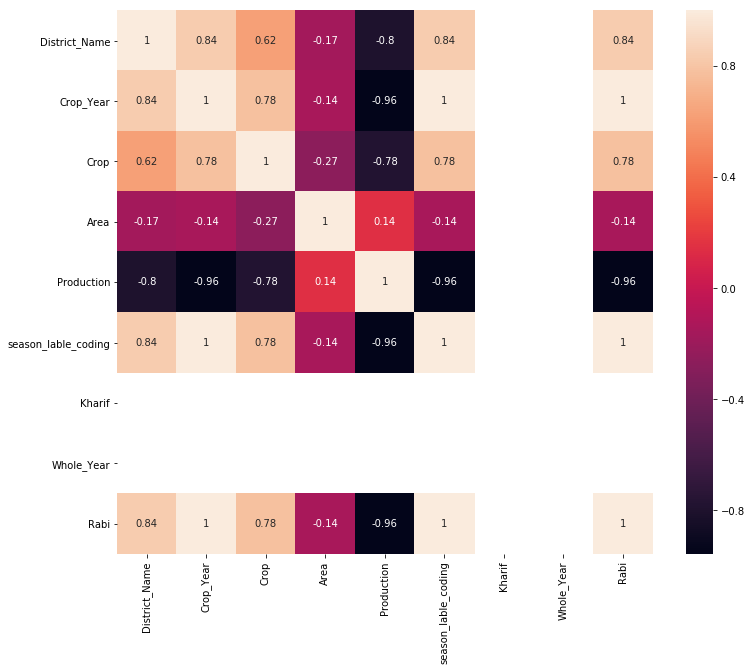

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
Var_Corr = data.corr()
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)
plt.show()

In [0]:
data.drop('Area',axis=1,inplace=True)










# OUTLIERS

In [0]:
from collections import Counter

def detect_outliers(df,n,features):
    """
    This function basically takes a dataframe, that contains everything about the features.
	And returs list of index of Observations if it possesses more than nn outliers.
    """
    outlier_index = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.75 * IQR
        
        # Determine a list of index of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_index.extend(outlier_list_col)
        
    # select observations containing more than n outliers
    outlier_index = Counter(outlier_index)        
    more_than_n_outliers = list( k for k, v in outlier_index.items() if v > n )
    
    return more_than_n_outliers

list1 = detect_outliers(data,0,data.columns)
print(list1)

[9, 21, 32, 33, 34, 39, 45, 84, 136, 144, 147, 149, 185, 213, 244, 283, 299, 340, 356, 359, 402, 407, 408, 435, 439, 453, 457, 458, 462, 470, 477, 480, 489, 490, 491, 493, 500, 521, 525, 528, 539, 555, 556, 560, 570, 598, 609, 610, 611, 619, 657, 666, 683, 685, 686, 929, 940, 946, 952, 966, 972, 974, 976, 977, 983, 995, 1006, 1011, 1028, 1029, 1034, 1035, 1131, 1141, 1146, 1147, 1151, 1152, 1154, 1158, 1161, 1166, 1191, 1223, 1224, 1253, 1254, 1459, 1470, 1472, 1476, 1485, 1489, 1497, 1500, 1502, 1507, 1510, 1512, 1517, 1521, 1528, 1533, 1537, 1542, 1547, 1551, 1558, 1562, 1564, 1568, 1571, 1614, 1617, 1678, 1685, 1686, 1698, 1700, 1707, 1712, 1713, 1739, 1771, 1804, 1860, 1864, 1865, 1873, 1875, 1879, 1891, 1919, 1931, 1935, 1936, 1940, 1943, 1945, 1949, 1989, 2024, 2031, 2037, 2046, 2052, 2059, 2061, 2064, 2070, 2080, 2084, 2086, 2093, 2096, 2106, 2115, 2121, 2128, 2131, 2134, 2140, 2141, 2150, 2163, 2168, 2199, 2201, 2207, 2217, 2263, 2270, 2285, 2286, 2291, 2292, 2295, 2302, 2310, 

In [0]:
data.drop(labels=list1,axis=0,inplace=True)


In [0]:
for col in data.columns:
        # 1st quartile (25%)
  Q1 = np.percentile(data[col], 25)
        # 3rd quartile (75%)
  Q3 = np.percentile(data[col],75)
        # Interquartile range (IQR)
  IQR = Q3 - Q1
        
        # outlier step
  outlier_step = 1.75 * IQR
  
  append_list = []
  
  for i in list1:
    if data[col][i]<Q1-outlier_step or data[col][i]>Q3+outlier_step:
      
      append_list.append(i)
    
    else:
      continue
  print(col)
  print(append_list)

District_Name
[]
Crop_Year
[]
Crop
[]
Area
[9, 21, 32, 33, 34, 39, 45, 84, 136, 144, 147, 149, 185, 213, 244, 283, 299, 340, 356, 359, 402, 407, 408, 435, 439, 453, 457, 458, 462, 470, 477, 480, 489, 490, 491, 493, 500, 521, 525, 528, 539, 555, 556, 560, 570, 598, 609, 610, 611, 619, 657, 666, 683, 685, 686, 929, 940, 946, 952, 966, 972, 974, 976, 977, 983, 995, 1006, 1011, 1028, 1029, 1034, 1035, 1131, 1141, 1146, 1147, 1151, 1152, 1154, 1158, 1161, 1166, 1191, 1223, 1224, 1253, 1254, 1459, 1470, 1472, 1476, 1485, 1489, 1497, 1500, 1502, 1507, 1510, 1512, 1517, 1521, 1528, 1533, 1537, 1542, 1547, 1551, 1558, 1562, 1564, 1568, 1571, 1614, 1617, 1678, 1685, 1686, 1698, 1700, 1707, 1712, 1713, 1739, 1771, 1804, 1860, 1864, 1865, 1873, 1875, 1879, 1891, 1919, 1931, 1935, 1936, 1940, 1943, 1945, 1949, 1989, 2024, 2031, 2037, 2046, 2052, 2059, 2061, 2064, 2070, 2080, 2084, 2086, 2093, 2096, 2106, 2115, 2121, 2128, 2131, 2134, 2140, 2141, 2150, 2163, 2168, 2199, 2201, 2207, 2217, 2263, 2270,

In [0]:
b = data['Crop'].value_counts()
b = pd.DataFrame(b)
b.columns = ['value']
#a['value']['ARIYALUR']
len(b)


87

In [0]:
for i in range(len(data)):
  if b['value'][data['Crop'][i]]<600 and b['value'][data['Crop'][i]]>500:
    data['Crop'][i] = 1
  elif b['value'][data['Crop'][i]]<=500 and b['value'][data['Crop'][i]]>450:
    data['Crop'][i] = 2
  elif b['value'][data['Crop'][i]]<=450 and b['value'][data['Crop'][i]]>400:
    data['Crop'][i] = 3
  elif b['value'][data['Crop'][i]]<=400 and b['value'][data['Crop'][i]]>350:
    data['Crop'][i] = 4
  elif b['value'][data['Crop'][i]]<=350 and b['value'][data['Crop'][i]]>250:
    data['Crop'][i] = 5
  elif b['value'][data['Crop'][i]]<=250 and b['value'][data['Crop'][i]]>150:
    data['Crop'][i] = 6
  elif b['value'][data['Crop'][i]]<=150 and b['value'][data['Crop'][i]]>100:
    data['Crop'][i] = 7
  elif b['value'][data['Crop'][i]]<=100 and b['value'][data['Crop'][i]]>50:
    data['Crop'][i] = 8
  else:
    data['Crop'][i] = 9
 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set 

In [0]:
Y = pd.DataFrame(data['Production'])
X = data.drop('Production',axis=1)

In [0]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10263 entries, 0 to 13546
Data columns (total 1 columns):
Production    10263 non-null float64
dtypes: float64(1)
memory usage: 480.4 KB


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.22, random_state=42)

In [0]:
clc=RandomForestRegressor(max_depth=5, n_estimators=100, random_state=42)
clc.fit(X_train,Y_train.values.ravel())
clc.score(X_test,Y_test.values.ravel())
 

0.9675919876359727

In [0]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True, normalize=True).fit(X_train, Y_train)
reg.score(X_test, Y_test)

0.9186649782902621

In [0]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, Y_train)
neigh.score(X_test,Y_test)

0.955459830447465